In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sys
import importlib

sys.path.append('G:\爬虫\PRSS数据分析')
import basic_proc_func as bpf


导入数据

In [217]:
PRSS_general_info = pd.read_excel('PRSS case report sup.xlsx',sheet_name=0)
PRSS_clin_manif = pd.read_excel('PRSS case report sup.xlsx',sheet_name=1)
PRSS_patho = pd.read_excel('PRSS case report sup.xlsx',sheet_name=2)
PRSS_treatment = pd.read_excel('PRSS case report sup.xlsx',sheet_name=3)

# 新一批cases 数据处理

## 一般情况

### 获取数据集：general_info

#### 获取数据列表

In [218]:
new_patient_list1 = PRSS_general_info.loc[[0,4,8,12,15,16,20,21,22,23]]
new_patient_list2 = PRSS_general_info[27:37]
new_patient_list3 = PRSS_general_info.loc[[40,47,48,50,57,60,64,66,67,72]]
new_patient_list4 = PRSS_general_info[77:82]
new_patient_list5 = PRSS_general_info[84:99]
new_patient_list6 = PRSS_general_info[102:118]
new_patient_list7 = PRSS_general_info[127:128]
new_patient_list8 = PRSS_general_info[130:137]
new_patient_list9 = PRSS_general_info[139:170]
new_patient_list10 = PRSS_general_info.loc[[172,175,176,177,180]]
new_patient_list11 = PRSS_general_info[182:190]
new_patient_list12 = PRSS_general_info[195:198]
new_patient_list13 = PRSS_general_info[200:202]
new_patient_list14 = PRSS_general_info.loc[[208,213,214,215,216,217,219,221,222,224,225,231,232,233,235,237,238,239]]
new_patient_list15 = PRSS_general_info[241:251]
general_info_list = [new_patient_list1,new_patient_list2,new_patient_list3,new_patient_list4,new_patient_list5,new_patient_list6,new_patient_list7,new_patient_list8,new_patient_list9,new_patient_list10,new_patient_list11,new_patient_list12,new_patient_list13,new_patient_list14,new_patient_list15]

#### 生成dataframe：general_info

In [219]:
# 1，2，4，5，6，16：title，journal，age，gender，site，备注
general_info = pd.concat(general_info_list,axis=0,ignore_index=False,join='outer').iloc[:,[1,2,4,5,6,16]]
general_info

,title,journal,age,gender,site,备注
0,Primary renal synovial sarcoma: A case report,World J Clin Cases,54.0,M,right,NaN
4,Multimodality-imaging manifestations of primar...,World J Clin Cases,43.0,M,allograft,NaN
8,Primary Renal Synovial Sarcoma Presenting as H...,J Kidney Cancer VHL,65.0,M,right,NaN
12,Synovial sarcoma of kidney in a child: A rare ...,J Indian Assoc Pediatr Surg,4.0,F,"right,upper",NaN
15,Renal Synovial Sarcoma in a Young Pregnant Lad...,J Clin Diagn Res,25.0,F,left,NaN
...,...,...,...,...,...,...
246,原发性肾脏滑膜肉瘤超声表现1例,中国超声医学工程学会第十一届全国腹部超声医学学术会议,40.0,M,"right,lower",NaN
247,原发性肾脏滑膜肉瘤1例报告,泌尿外科杂志(电子版),37.0,M,right,NaN
248,肾脏原发性滑膜肉瘤1例报告,现代泌尿外科杂志,42.0,M,"left,upper",NaN
249,肾脏原发性滑膜肉瘤1例,中国医学影像技术,37.0,M,"left,mid,upper",NaN


### 统计

#### 年龄

In [220]:
age = general_info['age']

文字统计

In [221]:
age.describe()

count    151.000000
mean      39.496689
std       15.605074
min        2.000000
25%       28.000000
50%       38.000000
75%       50.500000
max       78.000000
Name: age, dtype: float64

图像

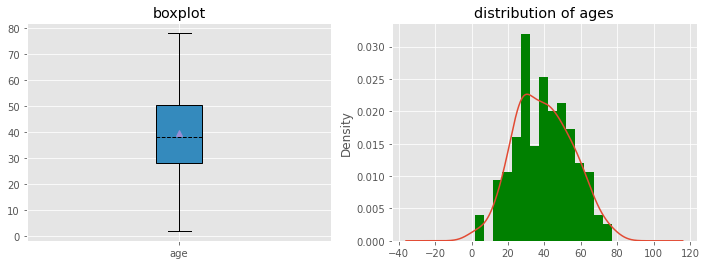

In [222]:
plt.style.use('ggplot')
fig , axes = plt.subplots(1,2,figsize=(12,4))
axes[0].boxplot(age,
            patch_artist=True,
            labels=['age'],
            showmeans=True,
            medianprops = {'linestyle':'--','color':'black'})
axes[0].set_title('boxplot')
axes[1].hist(age,
            bins=np.arange(age.min(),age.max(),5),
            density=True,
            color='green')
age.plot.kde()
axes[1].set_title('distribution of ages')
plt.show()

#### 性别

In [223]:
gender = general_info['gender']
gender.value_counts()

M    76
F    74
Name: gender, dtype: int64

<AxesSubplot:ylabel='gender'>

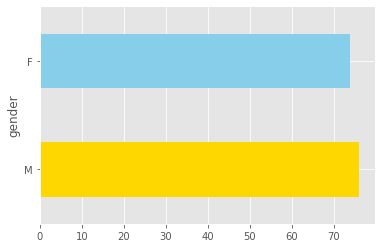

In [224]:
gender.value_counts().plot.barh(xlabel='gender',ylabel='frequency',color = ['gold','skyblue'])

#### 位置

In [225]:
site = general_info['site'].fillna('na')  #防止后面统计出错，补充缺省值为na
site.count()

151

先分析描述位置的词有哪些，再统计这些词的词频

In [226]:
site_info = set([])
for a,i in enumerate(site):
    position = i.lower().split(",")
    for j in position:
        site_info.add(j)
site_info

#初始化各变量的计数值为0
createVar = locals() 
for i in site_info:
    createVar[f'{i}'] = 0

for a,i in enumerate(site):
    try:
        if 'right' in i:
            right +=1
        if 'left' in i:
            left +=1
        if 'allograft' in i:
            allograft += 1
        if 'mid' in i:
            mid += 1
        if 'upper' in i:
            upper += 1
        if 'lower' in i:
            lower += 1
        if 'left' not in i and 'right' not in i:
            print(a,i)
    except:
        print(a,i,'error')

print(f'{left,right,allograft,upper,lower,mid}')

1 allograft
8 na
15 allograft
139 na
(62, 85, 2, 35, 30, 17)


可视化

<AxesSubplot:>

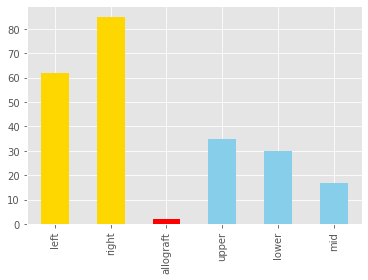

In [227]:
s= pd.Series({'left':left,'right':right,'allograft':allograft,'upper':upper,'lower':lower,'mid':mid})
s.plot.bar(color = ['gold','gold','r','skyblue','skyblue','skyblue'])

## 临床表现

#### 导入数据集

In [228]:
new_patient_list1_cm = PRSS_clin_manif.loc[[0,4,8,12,15,16,20,21,22,23]]
new_patient_list2_cm = PRSS_clin_manif[27:37]
new_patient_list3_cm = PRSS_clin_manif.loc[[40,47,48,50,57,60,64,66,67,72]]
new_patient_list4_cm = PRSS_clin_manif[77:82]
new_patient_list5_cm = PRSS_clin_manif[84:99]
new_patient_list6_cm = PRSS_clin_manif[102:118]
new_patient_list7_cm = PRSS_clin_manif[127:128]
new_patient_list8_cm = PRSS_clin_manif[130:137]
new_patient_list9_cm = PRSS_clin_manif[139:170]
new_patient_list10_cm = PRSS_clin_manif.loc[[172,175,176,177,180]]
new_patient_list11_cm = PRSS_clin_manif[182:190]
new_patient_list12_cm = PRSS_clin_manif[195:198]
new_patient_list13_cm = PRSS_clin_manif[200:202]
new_patient_list14_cm = PRSS_clin_manif.loc[[208,213,214,215,216,217,219,221,222,224,225,231,232,233,235,237,238,239]]
new_patient_list15_cm = PRSS_clin_manif[241:251]
clin_manif_list = [new_patient_list1_cm,new_patient_list2_cm,new_patient_list3_cm,new_patient_list4_cm,new_patient_list5_cm,new_patient_list6_cm,new_patient_list7_cm,new_patient_list8_cm,new_patient_list9_cm,new_patient_list10_cm,new_patient_list11_cm,new_patient_list12_cm,new_patient_list13_cm,new_patient_list14_cm,new_patient_list15_cm]

#### 生成dataframe：clin_manif

In [229]:
clin_manif = pd.concat(clin_manif_list,join='outer').iloc[:,[1,2,3,4,5]]
clin_manif

,title,past history,clinical manifestation,diagnostic tests,备注
0,Primary renal synovial sarcoma: A case report,NaN,mass,blood biochemistry:normal\ntumor markers:norma...,NaN
4,Multimodality-imaging manifestations of primar...,NaN,no,"renal function test:normal\nUS:multiple,,hypo-...",NaN
8,Primary Renal Synovial Sarcoma Presenting as H...,NaN,flank pain\nhaemodynamic instability,"CT:single, , , , ,retroperitoneal haematoma\nMRI:",NaN
12,Synovial sarcoma of kidney in a child: A rare ...,NaN,mass,"CT:single, , , , ,calcification;thrombus in ri...",NaN
15,Renal Synovial Sarcoma in a Young Pregnant Lad...,NaN,mass,MRI:single with mixed signal & hemorrhage,NaN
...,...,...,...,...,...
246,原发性肾脏滑膜肉瘤超声表现1例,NaN,abdominal distension,"US:single,,solid and cystic with septa,blood f...",NaN
247,原发性肾脏滑膜肉瘤1例报告,surgery:right renal cyst decortication,hematuria\nmass\nanemia,"US:single,,solid with cystic area,spotted bloo...",NaN
248,肾脏原发性滑膜肉瘤1例报告,NaN,flank pain\nhematuria\nmass,"urine analysis, culture, cytology and cystosco...",NaN
249,肾脏原发性滑膜肉瘤1例,NaN,flank soreness,"US:single,irregular & unclear,uneven hypoechoi...",NaN


#### 获取各列信息

In [230]:
past_history = clin_manif['past history']
CM = clin_manif['clinical manifestation']
diag_test = clin_manif['diagnostic tests']

### 统计

#### 既往史

In [231]:
past_history = past_history[past_history.notnull()]
# past_history[21]
# bpf.strblock2dict(bpf.split_n(past_history[21]))

将既往史整理成表格

In [232]:
split_n_ph = past_history.apply(bpf.split_n)

#使用映射转换list方便下一步转化成dict
def add_colon(list):
    pattern = {'hypertension':'hypertension:''yes''',
                'diabetes':'diabetes:''yes''',
                'coronary disease':'coronary disease:''yes''',
                'smoking':'smoking:''yes''',
                'drinking':'drinking:''yes'''}
    list = [pattern[x] if x.lower() in pattern else x for x in list]
    return list

dictize_ph = split_n_ph.apply(add_colon).apply(bpf.strblock2dict)

#将values换成一个list --- 没用

# def values2list(dict):
#     for key in dict.keys():
#         if not dict[key]:
#             dict[key] = (list(dict[key]))
#         else:
#             dict[key] = bpf.split_comma(dict[key])
#     return dict

# dictize_ph.apply(values2list)
# pd.DataFrame(dict_ph.apply(values2list),columns = ['hypertension','diabetes','coronary disease','smoking','drinking','other disease','surgery'])

# 保留原来的index
ls_index = dictize_ph.index
ls_value = []
for i in dictize_ph:
    ls_value.append(i)
df_ph = pd.DataFrame(ls_value, 
            index = ls_index,
            columns = ['hypertension','diabetes','coronary disease','smoking','drinking','other disease','surgery'])


分析和可视化

<AxesSubplot:>

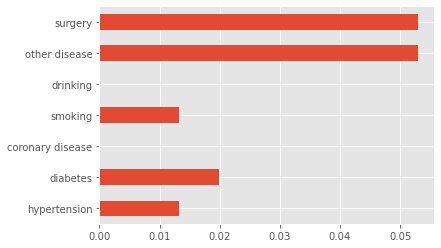

In [233]:
count = df_ph.count()/151
count.plot.barh()

#### 临床表现

In [234]:
CM = bpf.del_null(CM)
CM

0                                      mass
4                                        no
8      flank pain\nhaemodynamic instability
12                                     mass
15                                     mass
                       ...                 
246                    abdominal distension
247                 hematuria\nmass\nanemia
248             flank pain\nhematuria\nmass
249                          flank soreness
250                        mass\nflank pain
Name: clinical manifestation, Length: 124, dtype: object

##### 统计及可视化

生成一个set看都有哪些临床表现

In [235]:
CM_info = set([])
for a,i in enumerate(CM):
    symps = i.lower().split("\n")
    for j in symps:
        CM_info.add(j)
CM_info = list(CM_info) 
CM_info.sort()   


建立dataframe CM_empty 统计各症状出现频次，并对频数、频率进行可视化

,abdominal distension,abdominal mass,abdominal pain,anemia,dysuria,fatigue,fever,flank fullness,flank pain,flank pain,...,ivc thrombosis,loss of appetite & weight loss,mass,nausia & vomitting,no,pedal edema,pelvic bone pain,pleural effusion,pulmonary embolism,varicocele
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


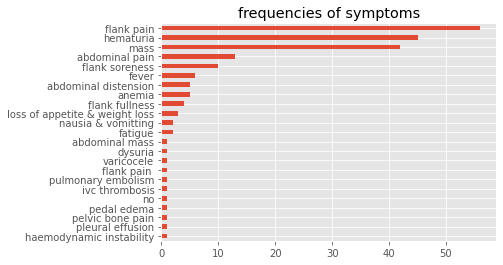

In [236]:
CM_empty = pd.DataFrame(index = CM.index,columns=CM_info)
for a,i in enumerate(CM): # a从0数起，为iloc数字索引
    symps = i.lower().split("\n")
    for j in symps:
        CM_empty.iloc[a,CM_info.index(j)] = 1

CM_empty.count().sort_values().plot.barh(title = 'frequencies of symptoms')
CM_empty

<AxesSubplot:title={'center':'probabilities of symptoms'}>

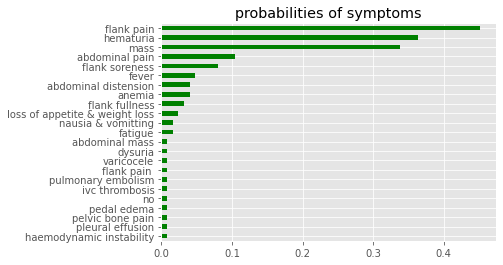

In [237]:
prob = CM_empty.count() / CM.count()
prob.sort_values().plot.barh(color = 'g',title = 'probabilities of symptoms')

#### 检查结果

In [238]:
diag_test = bpf.del_null(diag_test)   #这一步不必要，函数内已经进行查重
print(f'number of all cases with diagnostic tests:{diag_test.count()}')

number of all cases with diagnostic tests:98


##### 统计及可视化

先获得整体的检查结果的表格，后面分开分析

In [239]:
diag_test_df = bpf.diag_test(diag_test)

#分别获取每一种检查的series并以对应的column_name命名
createVar_dt = locals()
for i in diag_test_df.columns:
    createVar[f'{i}'] = diag_test_df[f'{i}']

print(diag_test_df.columns)
# CT  #测试一下

Index(['blood biochemistry', 'tumor markers', 'CT', 'US',
       'renal function test', 'PET', 'MRI',
       'urine analysis, culture, cytology and cystoscopy', 'cystoscopy',
       'blood test', 'renogram', 'angiography', 'blood tests'],
      dtype='object')


1.  CT

In [240]:
CT = bpf.del_null(CT)
bpf.data_validator('CT',CT) #验证数据格式准确性
bpf.CT(CT)

,amount,border,density,enhancement,enhancement pattern,other findings
0,single,irregular,mixed,uneven,,
4,multiple,,hyperdensity,even,slow in,
8,single,,,,,retroperitoneal haematoma
12,single,,,,,calcification;thrombus in right renal vein alo...
16,single,regular,,,,tumor thrombus extending superiorly to suprahe...
...,...,...,...,...,...,...
246,single,,mixed density with cystic area & septa,,,
247,single,unclear,mixed iso/hypodense,slight uneven enhancement,,
248,single,clear,mixede density,slight enhancement with liquid signal in center,,filling defect in renal calyces & pelvis
249,single,irregular,mixed,significant uneven,,calcification;enlarged lymph node;pulmonary no...


2.  US

In [241]:
US = bpf.del_null(US)
bpf.data_validator('US',US) #验证数据格式准确性
bpf.CT(US)

,amount,border,density,enhancement,enhancement pattern,other findings
0,single,irregular,,doted,slow in fast out,
4,multiple,,hypo-echo,doted,,
16,single,regular,hyperechoic anechoic centrally,,,
40,single,,,,,cystic changes
47,single,,hypoechoic,,,
57,single,regular,mixed,,,
80,single,,mixed hypo/isoechoic,,,
86,kidney & adrenal gland,,hypoechoic,,,
88,single,,,,,
90,single,,hypoechoic,no significant blood flow,,


3.  MRI

In [242]:
MRI = bpf.del_null(MRI)
bpf.data_validator('MRI',MRI) #验证数据格式准确性
bpf.MRI(MRI)

,T1WI,T2WI,T2-FLAIR,DWI,ADC,other findings
8,NaN,NaN,NaN,NaN,NaN,
15,NaN,NaN,NaN,NaN,NaN,single with mixed signal & hemorrhage
20,NaN,NaN,NaN,NaN,NaN,single mass with regular border & mixed signal...
50,slightly high signal as renal medulla,slightly low signal,NaN,NaN,NaN,
86,low signal,medium signal,NaN,NaN,NaN,
90,mixed signal,mixed signal,high signal,NaN,NaN,
92,iso-signal,NaN,uneven high signal urinary,NaN,NaN,
93,lower than muscle,higher than muscle,NaN,NaN,NaN,
98,low signal,high signal,NaN,NaN,NaN,
103,low signal,medium signal,NaN,NaN,NaN,


4.  PET

In [243]:
bpf.del_null(PET)
bpf.PET(PET)

5.  其他杂项

In [244]:
blood_biochem = diag_test_df['blood biochemistry']
tumor_markers = diag_test_df['tumor markers']
renal_func = diag_test_df['renal function test']
urine_analysis = diag_test_df['urine analysis, culture, cytology and cystoscopy']
cystoscopy = diag_test_df['cystoscopy']
renogram = diag_test_df['renogram']
angiography = diag_test_df['angiography']
blood_tests = diag_test_df['blood tests']

remain_test_list = [blood_biochem,tumor_markers,renal_func,urine_analysis,cystoscopy,renogram,angiography,blood_tests]

remain_test_df = pd.concat([bpf.del_null(i) for i in remain_test_list],axis = 1,join='outer')
remain_test_df

,blood biochemistry,tumor markers,renal function test,"urine analysis, culture, cytology and cystoscopy",cystoscopy,renogram,angiography,blood tests
0,normal,normal,NaN,NaN,NaN,NaN,NaN,NaN
16,normal,NaN,normal,NaN,NaN,NaN,NaN,NaN
47,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,normal,NaN,normal,NaN,right ureter bleeding,NaN,NaN,NaN
57,LDH 1114 IU/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN
247,NaN,"CA199 52.75 ku /L,CA242 45.28 ku /L",NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,normal,NaN,NaN,NaN,NaN,NaN


In [245]:
print(f'total number of cases is {clin_manif.shape[0]}\n')
print(remain_test_df.count())

total number of cases is 151

blood biochemistry                                  7
tumor markers                                       3
renal function test                                 7
urine analysis, culture, cytology and cystoscopy    4
cystoscopy                                          1
renogram                                            5
angiography                                         2
blood tests                                         1
dtype: int64


## 病理

### 导入数据集

In [246]:
new_patient_list1_patho = PRSS_patho.loc[[0,4,8,12,15,16,20,21,22,23]]
new_patient_list2_patho = PRSS_patho[27:37]
new_patient_list3_patho = PRSS_patho.loc[[40,47,48,50,57,60,64,66,67,72]]
new_patient_list4_patho = PRSS_patho[77:82]
new_patient_list5_patho = PRSS_patho[84:99]
new_patient_list6_patho = PRSS_patho[102:118]
new_patient_list7_patho = PRSS_patho[127:128]
new_patient_list8_patho = PRSS_patho[130:137]
new_patient_list9_patho = PRSS_patho[139:170]
new_patient_list10_patho = PRSS_patho.loc[[172,175,176,177,180]]
new_patient_list11_patho = PRSS_patho[182:190]
new_patient_list12_patho = PRSS_patho[195:198]
new_patient_list13_patho = PRSS_patho[200:202]
new_patient_list14_patho = PRSS_patho.loc[[208,213,214,215,216,217,219,221,222,224,225,231,232,233,235,237,238,239]]
new_patient_list15_patho = PRSS_patho[241:251]
patho_list = [new_patient_list1_patho,new_patient_list2_patho,new_patient_list3_patho,new_patient_list4_patho,new_patient_list5_patho,new_patient_list6_patho,new_patient_list7_patho,new_patient_list8_patho,new_patient_list9_patho,new_patient_list10_patho,new_patient_list11_patho,new_patient_list12_patho,new_patient_list13_patho,new_patient_list14_patho,new_patient_list15_patho]

In [247]:
patho = pd.concat(patho_list,join='outer').iloc[:,[1,2,3,4,5,6]]
patho

,title,gross,LM,IHC,genetic testing,备注
0,Primary renal synovial sarcoma: A case report,size:6.8cm\ninvasion:renal sinus\nappearance:c...,cell shape:spindle\ntype:monophasic\nresection...,"Spindle positive:Bcl-2,Vimentin,Pax-8,CK7\nspi...",SYT rearrangement,NaN
4,Multimodality-imaging manifestations of primar...,"size:5.7cm\ninvasion:renal parenchyma,\nappear...",cell shape:spindle\ntype:monophasic\ninvolveme...,"Spindle positive:Bcl-2,TLE-1,Vimentin,CD99\nsp...","SYT-SSX（X,18）translocation",NaN
8,Primary Renal Synovial Sarcoma Presenting as H...,size:18.0 × 11.5 × 9.0 cm\nsecondary changes:h...,cell shape:spindle\narrangement:fascicular and...,"Spindle positive:vimentin,CD99,TLE-1,Bcl2\nspi...",NaN,NaN
12,Synovial sarcoma of kidney in a child: A rare ...,size:11 x 8 cm,cell shape:spindle\n,"Spindle positive:vimentin,CD99,EMA,S100,Bcl-2\...",SYT-SSX2 translocation,NaN
15,Renal Synovial Sarcoma in a Young Pregnant Lad...,size:13 x 11 x 10cm\nsecondary changes:hemorrh...,"cell shape:spindle\narrangement:sheets,fascicl...","Spindle positive:TLE-1,CD56,CD99,vimentin\nspi...",SYT-SSX2 translocation,NaN
...,...,...,...,...,...,...
246,原发性肾脏滑膜肉瘤超声表现1例,"size:14.2x13.9cm\ninvasion:perirenal fat,renal...",NaN,"Spindle positive:p53,vimentin,actin,CDK4,\nspi...",NaN,NaN
247,原发性肾脏滑膜肉瘤1例报告,size:14x11cm,NaN,"Spindle positive:vimentin,Bcl2\nspindle negati...",NaN,NaN
248,肾脏原发性滑膜肉瘤1例报告,"size:11.5x10.3x10cm\ninvasion:renal calyces,re...",type:monophasic,NaN,SYT-SSX fusion,NaN
249,肾脏原发性滑膜肉瘤1例,size:9x7.9cm\ninvasion:renal vein,cell shape:spindle,"Spindle positive:Bcl2,CD10,vimentin,CD99",NaN,NaN


In [248]:
gross = patho['gross']
LM = patho['LM']
IHC = patho['IHC']
genetic_testing = patho['genetic testing']

### gross

In [249]:
gross = bpf.del_null(gross)
gross_df = bpf.diag_test(gross)
gross_df

0 keyerror


,size,invasion,appearance,secondary changes
0,6.8cm,renal sinus,cystic,NaN
4,5.7cm,"renal parenchyma,",solid,no
8,18.0 × 11.5 × 9.0 cm,NaN,NaN,hemorrhage
12,11 x 8 cm,NaN,NaN,NaN
15,13 x 11 x 10cm,NaN,NaN,"hemorrhage,necrosis"
...,...,...,...,...
245,7.5x6.5cm,NaN,"greyish-yellow,fish-meat like","hemorrhag,necrosis,cystic change in periphery"
246,14.2x13.9cm,"perirenal fat,renal fascia,psoas major","grey-white,cauliflower shape",NaN
247,14x11cm,NaN,NaN,NaN
248,11.5x10.3x10cm,"renal calyces,renal pelvis,psoas major",fish-meat like,"hemorrhage,necrosis"


### LM

In [250]:
LM = bpf.del_null(LM)
LM_df = bpf.diag_test(LM)
LM_df[['cell shape','arrangement','cell shape_1','arrangement_1','type','secondary changes','involvement','resection margin','hpf']]

,cell shape,arrangement,cell shape_1,arrangement_1,type,secondary changes,involvement,resection margin,hpf
0,spindle,NaN,NaN,NaN,monophasic,NaN,NaN,free,NaN
4,spindle,NaN,NaN,NaN,monophasic,NaN,vessles,free,NaN
8,spindle,fascicular and storiform,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,spindle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,spindle,"sheets,fascicles,focal perivascular",NaN,NaN,NaN,"necrosis,myxoid changes",NaN,free,NaN
...,...,...,...,...,...,...,...,...,...
243,spindle,sheets & fascicles,hobnail,form the cystic wall,NaN,NaN,NaN,NaN,NaN
244,spindle,sheets & fascicles,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,spindle,sheets & fascicles,hobnail,form the cystic wall,NaN,NaN,NaN,NaN,NaN
248,NaN,NaN,NaN,NaN,monophasic,NaN,NaN,NaN,NaN


### IHC

先生成一个markers的集合，用于创建dataframe的列，然后创建一个空的IHC的列表

In [251]:
IHC_df = bpf.diag_test(IHC)
markers = set([])
markers_lower = set([])  #创建一个同步的set，用于储存小写转换后的marker名字
map = {}
## extract every markers iterating through every items in df
mask = IHC_df.fillna('bcl2')
for i in range(mask.shape[0]):
    IHC_row = mask.iloc[i,:]
    for j in range(mask.shape[1]):
        marker_list = mask.iloc[i,j].split(',')
        for k in marker_list:
            #去掉空格
            k = k.strip(' ')
            #如果存在横杠且横杠后面为数字，去掉横杠
            if '-' in k:  
                if k.split('-')[1][0].isdigit():
                    k = ''.join(k.split('-'))
            if k and k.lower() not in markers_lower:
                markers.add(k)
                markers_lower.add(k.lower())
                map[k.lower()] = k

IHC_empty = pd.DataFrame(index = IHC_df.index,columns = markers)
IHC_empty

,HMB54,DOG1,myoD1,CK8,calponin,HMB,low-molecular-weight CK,CDK4,nestin,CD66,...,HHF35,N-cam,cam5.2,CD45,PS04S,CK,melanin A,cytokeratin KL1,calretinin,progesterone receptor
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


处理IHC数据，填补到IHC_empty

In [252]:
IHC_df

,Spindle positive,spindle negative,Spindle Focal positive,Epi positive,epi negative,epi focal positive,spindle positive,spindle focal positive
0,"Bcl-2,Vimentin,Pax-8,CK7","SMA,soluble protein-100,EMA,CD99,Pax-2",,NaN,NaN,NaN,NaN,NaN
4,"Bcl-2,TLE-1,Vimentin,CD99",INI-1,Ki-67,NaN,NaN,NaN,NaN,NaN
8,"vimentin,CD99,TLE-1,Bcl2","pan-CK,","CD34,CD31,RCC,CD10,S100,EMA,SMA",NaN,NaN,NaN,NaN,NaN
12,"vimentin,CD99,EMA,S100,Bcl-2","CD10,desmin,myogenin",NaN,NaN,NaN,NaN,NaN,NaN
15,"TLE-1,CD56,CD99,vimentin","desmin,myogenin,EMA,CK,WT1",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
244,"vimentin,CK7","CD34,CD99","panCK,EMA,CD10",NaN,NaN,NaN,NaN,NaN
245,"vimentin,Bcl2,CD99,EMA",CK7,NaN,NaN,NaN,NaN,NaN,NaN
246,"p53,vimentin,actin,CDK4,","CK,CK7,CD20,p63,GATA3,S100,WT1",NaN,NaN,NaN,NaN,NaN,NaN
247,"vimentin,Bcl2","desmin,SMA,S100,calponin,CD10,CD34,CD117","CK19,CK,EMA",NaN,NaN,NaN,NaN,NaN


In [253]:
def table_filler_marker(series,df_empty):
    #构造一个类名到标签的映射
    marker_dict = {
        'Spindle positive':'spin:+',
        'spindle negative':'spin:-',
        'Spindle Focal positive':'spin:±',
        'Epi positive':'epi:+',
        'epi negative':'epi:-',
        'epi focal positive':'epi:±',
        'spindle positive':'spin:+',
        'spindle focal positive':'spin:±'
    }
    def get_marker_result(series_name):
        return marker_dict.get(series_name)

    def get_marker_name_for_column(marker_name):
        a = map.get(marker_name)
        return a
    #正式处理
    series = bpf.del_null(series)
    for a,i in series.items():
        markers_ls = i.split(',')
        for j in markers_ls:
                j = j.strip(' ')
                if '-' in j:  
                    if j.split('-')[1][0].isdigit():
                        j = ''.join(j.split('-'))
                if j:
                    if df_empty.loc[a,get_marker_name_for_column(j.lower())] == 'nan':  #这个if没起到作用
                        df_empty.loc[a,get_marker_name_for_column(j.lower())] = get_marker_result(series.name)
                    else:
                        df_empty.loc[a,get_marker_name_for_column(j.lower())] = str(df_empty.loc[a,get_marker_name_for_column(j.lower())]) + '\n' + get_marker_result(series.name)

    return df_empty

for column in IHC_df.columns:
    IHC_empty = table_filler_marker(IHC_df[f'{column}'],IHC_empty)
IHC_empty = IHC_empty[IHC_empty.notnull()].applymap(lambda x:str(x).lstrip('nan\n'))
IHC_empty

,HMB54,DOG1,myoD1,CK8,calponin,HMB,low-molecular-weight CK,CDK4,nestin,CD66,...,HHF35,N-cam,cam5.2,CD45,PS04S,CK,melanin A,cytokeratin KL1,calretinin,progesterone receptor
0,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
8,,,,,,,,,,,...,,,,,,,,,,
12,,,,,,,,,,,...,,,,,,,,,,
15,,,,,,,,,,,...,,,,,,spin:-,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,,,,,,,,,,,...,,,,,,,,,,
245,,,,,,,,,,,...,,,,,,,,,,
246,,,,,,,,spin:+,,,...,,,,,,spin:-,,,,
247,,,,,spin:-,,,,,,...,,,,,,spin:±,,,,


In [254]:
IHC_empty.to_excel('IHC_new.xlsx')

## 治疗和预后

### 导入数据集

In [255]:
new_patient_list1_treat = PRSS_treatment.loc[[0,4,8,12,15,16,20,21,22,23]]
new_patient_list2_treat = PRSS_treatment[27:37]
new_patient_list3_treat = PRSS_treatment.loc[[40,47,48,50,57,60,64,66,67,72]]
new_patient_list4_treat = PRSS_treatment[77:82]
new_patient_list5_treat = PRSS_treatment[84:99]
new_patient_list6_treat = PRSS_treatment[102:118]
new_patient_list7_treat = PRSS_treatment[127:128]
new_patient_list8_treat = PRSS_treatment[130:137]
new_patient_list9_treat = PRSS_treatment[139:170]
new_patient_list10_treat = PRSS_treatment.loc[[172,175,176,177,180]]
new_patient_list11_treat = PRSS_treatment[182:190]
new_patient_list12_treat = PRSS_treatment[195:198]
new_patient_list13_treat = PRSS_treatment[200:202]
new_patient_list14_treat = PRSS_treatment.loc[[208,213,214,215,216,217,219,221,222,224,225,231,232,233,235,237,238,239]]
new_patient_list15_treat = PRSS_treatment[241:251]
treat_list = [new_patient_list1_treat, new_patient_list2_treat, new_patient_list3_treat, new_patient_list4_treat, new_patient_list5_treat, new_patient_list6_treat, new_patient_list7_treat, new_patient_list8_treat, new_patient_list9_treat,new_patient_list10_treat,new_patient_list11_treat,new_patient_list12_treat,new_patient_list13_treat,new_patient_list14_treat,new_patient_list15_treat]

生成dataframe   

In [256]:
treat = pd.concat(treat_list,axis=0,ignore_index=False,join='outer').iloc[:,1:13]
treat

,title,grade,neo-chemo,neo-radio,surgery,chemo,radio,adj-chemo,adj-radio,ADR,outcome,备注
0,Primary renal synovial sarcoma: A case report,NaN,NaN,NaN,"radical,right,nephrectomy,",":cyclophosphamide; ;4ws,adriamycin; ;4ws,vinc...",NaN,NaN,NaN,NaN,DFS:2ys\nLost follow up:no,NaN
4,Multimodality-imaging manifestations of primar...,NaN,NaN,NaN,"radical,allograft,nephrectomy,",NaN,NaN,NaN,NaN,NaN,DFS:2ms\nrecurrence:lung metastasis,复发后用药：Anlotinib，明显减少肺结节
8,Primary Renal Synovial Sarcoma Presenting as H...,NaN,NaN,NaN,"radical,right,nephrectomy,","6:docetaxel; ; ,gemcitabine; ;",NaN,NaN,NaN,NaN,DFS:9ms,NaN
12,Synovial sarcoma of kidney in a child: A rare ...,NaN,"4:ifosfamide;1.8 g/m2 /day;3 days,adriamycin;3...",NaN,"radical,right,nephrectomy,removal of IVC thrombus",NaN,NaN,"2:ifosfamide;1.8 g/m2 /day;3 days,adriamycin;3...",NaN,NaN,recurrence:yes\ndeath:extensive metastasis\nsu...,NaN
15,Renal Synovial Sarcoma in a Young Pregnant Lad...,NaN,NaN,NaN,"radical,left,nephrectomy,",NaN,NaN,"3:ifosfamide;1800 mg/m2;,doxorubicin;25 mg/m2;",NaN,NaN,DFS:3ys\nrecurrence:no\nLost follow up:no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
246,原发性肾脏滑膜肉瘤超声表现1例,NaN,NaN,NaN,",,,",NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,原发性肾脏滑膜肉瘤1例报告,NaN,NaN,NaN,"radical,right,nephrectomy,right adrenalectomy",NaN,NaN,":ifosfamide;;,adriamycin;;,DDP;;",NaN,NaN,DFS:7ms\nlost follow up:no,NaN
248,肾脏原发性滑膜肉瘤1例报告,NaN,NaN,NaN,",left,tumorectomy,resection of recurrent tumor...",NaN,NaN,NaN,":,,",NaN,recurrence:local\nsurvival:32ms\ndeath:no\nlos...,目前无瘤
249,肾脏原发性滑膜肉瘤1例,NaN,NaN,NaN,"radical,left,nephrectomy,",NaN,NaN,NaN,NaN,NaN,NaN,NaN


### chemo

In [257]:
neochemo = treat['neo-chemo']
chemo = treat['chemo']
adjchemo = treat['adj-chemo']

In [258]:
bpf.data_validator('chemo',bpf.del_null(neochemo)) 
bpf.data_validator('chemo',bpf.del_null(chemo))
bpf.data_validator('chemo',bpf.del_null(adjchemo))

#### adjchemo

In [259]:
bpf.chemo_(adjchemo)

,cycle1,cycle2,cycle3,drugs
12,2:ifosfamide-1.8 g/m2 /day-3 days\nadriamycin-...,None,None,"{ifosfamide, adriamycin}"
15,3:ifosfamide-1800 mg/m2-\ndoxorubicin-25 mg/m2-,None,None,"{ifosfamide, doxorubicin}"
16,:adriamycin--\nifosfamide--,None,None,"{ifosfamide, adriamycin}"
48,:pirarubicin--\ndacarbazine--,None,None,"{pirarubicin, dacarbazine}"
57,6:ifosfamide-2500 mg/m2-day 1 through 3\ndoxor...,None,None,"{ifosfamide, doxorubicin}"
66,:--,None,None,{}
72,:vincristine--\ndoxurubicin--\nisofosfamide--\...,None,None,"{vincristine, doxurubicin, etoposide, isofosfa..."
77,2:ifosfamide--\nPirarubicin--\nDacarbazine--,None,None,"{ifosfamide, Dacarbazine, Pirarubicin}"
78,:Ifosfamide-2.5g/m2-5d\nDoxorubicin-60mg/m2-5d,None,None,"{Ifosfamide, Doxorubicin}"
80,:Adriamycin--3ms\nifosfamide--3ms,:simple heat therapy--,None,"{ifosfamide, simple heat therapy, Adriamycin}"


#### chemo

In [260]:
bpf.chemo_(chemo)

,cycle1,drugs
0,:cyclophosphamide- -4ws\nadriamycin- -4ws\nvi...,"{vincristine, adriamycin, cyclophosphamide}"
8,6:docetaxel- - \ngemcitabine- -,"{docetaxel, gemcitabine}"
47,5:imatinib--\nvincristine--\nadriamycin--\ncyc...,"{vincristine, adriamycin, cisplatinum, etoposi..."
197,3:ifosfamide--\nadriamycin--,"{ifosfamide, adriamycin}"
231,:doxorubicin--\nifosfamide--,"{ifosfamide, doxorubicin}"


#### neochemo

In [261]:
bpf.chemo_(neochemo)

,cycle1,cycle2,drugs
12,4:ifosfamide-1.8 g/m2 /day-3 days\nadriamycin-...,None,"{ifosfamide, adriamycin}"
72,3:vincristine--,None,{vincristine}
182,3:Doxorubicin-37.5 mg/m2/day-2ds\nIfosfamide-3...,None,"{Ifosfamide, Doxorubicin}"
201,5:chemotherapy--,6:biological treatment--,"{biological treatment, chemotherapy}"


### surgery

In [262]:
importlib.reload(bpf)
surgery = bpf.del_null(treat['surgery'])
surgery
# bpf.surgery(surgery)
bpf.data_validator('surgery',surgery)

iloc79,,left,nephrectomy,wrong number of comma


In [274]:
surgery.iloc[78]

'radical,left,nephrectomy,urectomy'